In [1]:
!pip install kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content/

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:18<00:00, 161MB/s]
100% 2.29G/2.29G [00:18<00:00, 134MB/s]


In [2]:
import zipfile

with zipfile.ZipFile("chest-xray-pneumonia.zip", "r") as zip_ref:
    zip_ref.extractall()

In [3]:
import os

dataset_path = "chest_xray"

def count_images(folder):
    categories = os.listdir(folder)
    counts = {category: len(os.listdir(os.path.join(folder, category))) for category in categories}
    return counts

train_counts = count_images(os.path.join(dataset_path, "train"))
test_counts = count_images(os.path.join(dataset_path, "test"))
val_counts = count_images(os.path.join(dataset_path, "val"))

print("Training Set:", train_counts)
print("Testing Set:", test_counts)
print("Validation Set:", val_counts)

Training Set: {'PNEUMONIA': 3875, 'NORMAL': 1341}
Testing Set: {'PNEUMONIA': 390, 'NORMAL': 234}
Validation Set: {'PNEUMONIA': 8, 'NORMAL': 8}


<ipython-input-4-ba19db597123>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='viridis')


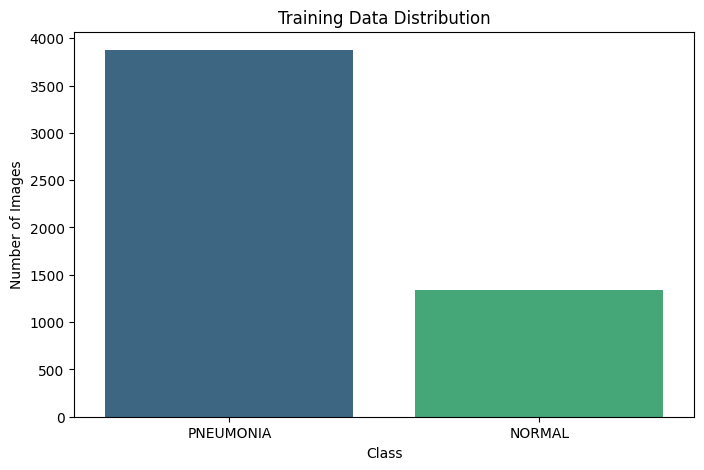

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='viridis')
plt.title("Training Data Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

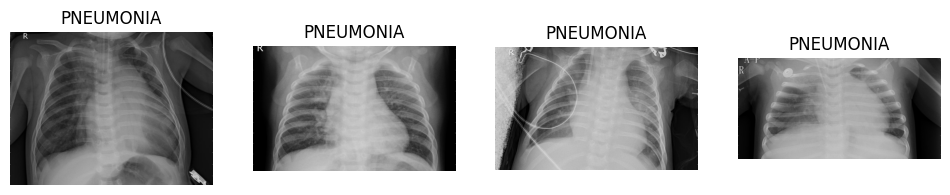

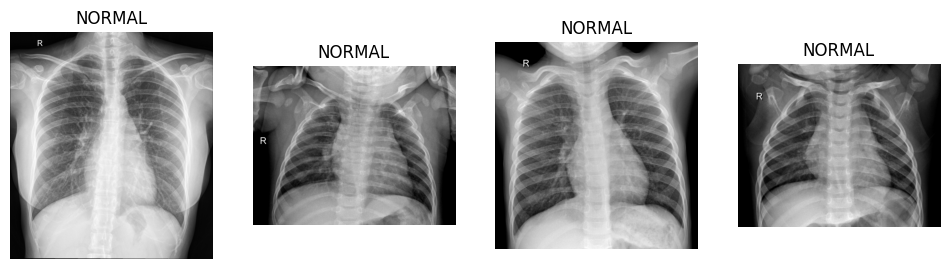

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

def show_sample_images(folder, category, num_samples=4):
    category_path = os.path.join(folder, category)
    sample_files = np.random.choice(os.listdir(category_path), num_samples, replace=False)

    plt.figure(figsize=(12, 6))
    for i, file in enumerate(sample_files):
        img = load_img(os.path.join(category_path, file))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(category)
    plt.show()

for category in train_counts.keys():
    show_sample_images(os.path.join(dataset_path, "train"), category)

In [9]:
import cv2

def calculate_mean_pixel(folder):
    pixel_means = []
    category_path = os.path.join(train_path, folder)
    sample_files = os.listdir(category_path)[:100]

    for file in sample_files:
        img = cv2.imread(os.path.join(category_path, file), cv2.IMREAD_GRAYSCALE)
        pixel_means.append(np.mean(img))

    return np.mean(pixel_means)

normal_mean = calculate_mean_pixel("NORMAL")
pneumonia_mean = calculate_mean_pixel("PNEUMONIA")

print(f"Mean Pixel Value (NORMAL): {normal_mean:.2f}")
print(f"Mean Pixel Value (PNEUMONIA): {pneumonia_mean:.2f}")

Mean Pixel Value (NORMAL): 121.76
Mean Pixel Value (PNEUMONIA): 121.92


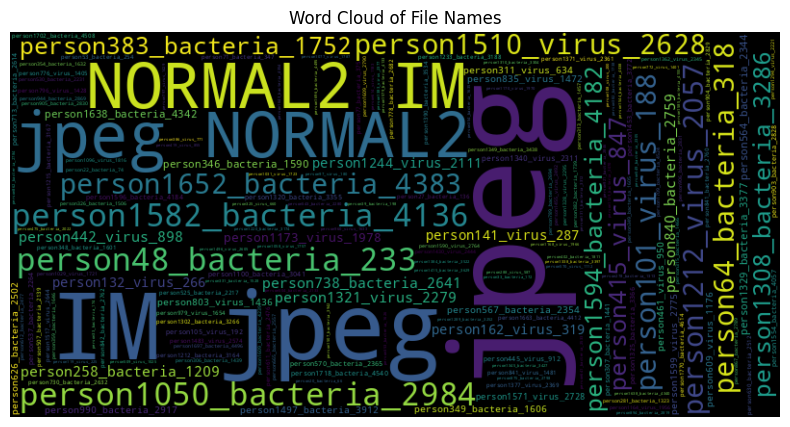

In [11]:
from wordcloud import WordCloud

file_names = []
for category in categories:
    category_path = os.path.join(train_path, category)
    file_names.extend(os.listdir(category_path))

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(file_names))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of File Names")
plt.show()